In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataUtils import *
from DNNModel import *

In [2]:
df = pd.read_csv("Binance_ETHUSDT_minute.csv")
df = df.iloc[::-1]
df.set_index(["date"], inplace=True)

In [3]:
df.head()

,open,high,low,close,VolETH
date,,,,,
9/11/2020 20:40,369.00,369.00,368.61,368.69,631.71643
9/11/2020 20:41,368.68,369.05,368.64,369.01,274.35788
9/11/2020 20:42,369.02,369.02,368.70,368.71,152.76667
9/11/2020 20:43,368.70,368.84,368.70,368.84,75.44480
9/11/2020 20:44,368.76,368.76,368.59,368.68,212.69913


In [4]:
createFeatures(df)
cols = createLags(df, 5)

In [5]:
split = int(len(df)*0.7)
train = df.iloc[:split].copy()
test = df.iloc[split:].copy()

In [6]:
mu, std = train.mean(), train.std()
train_s = (train - mu) / std
train_s.describe()

,open,high,low,close,VolETH,Returns,Direction,SMA,EMA,Min,...,UpperBB_lag_1,UpperBB_lag_2,UpperBB_lag_3,UpperBB_lag_4,UpperBB_lag_5,LowerBB_lag_1,LowerBB_lag_2,LowerBB_lag_3,LowerBB_lag_4,LowerBB_lag_5
count,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,...,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05,2.434170e+05
mean,2.241819e-17,-5.978184e-17,-1.270364e-16,1.494546e-17,-2.653403e-16,2.919035e-18,6.690428e-17,-2.017637e-16,-8.967275e-17,5.417729e-17,...,9.714548e-17,2.540728e-16,4.633092e-16,-4.633092e-16,7.472730e-17,6.725457e-17,-3.138546e-16,-4.259456e-16,2.989092e-16,1.793455e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.718544e-01,-9.701700e-01,-9.748694e-01,-9.720613e-01,-7.929719e-01,-3.045664e+01,-9.912081e-01,-9.636556e-01,-9.636843e-01,-1.953512e+01,...,-9.622218e-01,-9.622147e-01,-9.622075e-01,-9.622004e-01,-9.621933e-01,-9.718111e-01,-9.718040e-01,-9.717969e-01,-9.717898e-01,-9.717826e-01
25%,-8.293724e-01,-8.295709e-01,-8.291714e-01,-8.293787e-01,-5.196482e-01,-3.927321e-01,-9.912081e-01,-8.293935e-01,-8.294219e-01,-2.309277e-01,...,-8.302366e-01,-8.302304e-01,-8.302233e-01,-8.302189e-01,-8.302128e-01,-8.284935e-01,-8.284863e-01,-8.284825e-01,-8.284765e-01,-8.284698e-01
50%,-4.291834e-01,-4.295645e-01,-4.287528e-01,-4.291896e-01,-2.943564e-01,-3.445018e-03,-9.912081e-01,-4.291475e-01,-4.289717e-01,2.932480e-01,...,-4.313467e-01,-4.313389e-01,-4.313381e-01,-4.313308e-01,-4.313241e-01,-4.272139e-01,-4.272064e-01,-4.272020e-01,-4.271956e-01,-4.271881e-01
75%,8.603747e-01,8.604221e-01,8.599137e-01,8.603886e-01,1.273337e-01,3.923931e-01,1.008866e+00,8.607449e-01,8.605382e-01,6.072086e-01,...,8.615091e-01,8.615179e-01,8.615261e-01,8.615349e-01,8.615282e-01,8.597174e-01,8.597234e-01,8.597253e-01,8.597283e-01,8.597111e-01
max,2.486964e+00,2.487406e+00,2.483702e+00,2.486958e+00,3.035668e+01,2.725549e+01,1.008866e+00,2.472772e+00,2.471083e+00,7.751313e-01,...,2.479444e+00,2.479456e+00,2.479467e+00,2.479479e+00,2.479490e+00,2.485241e+00,2.485253e+00,2.485264e+00,2.485275e+00,2.485286e+00


In [7]:
set_seeds(100)
model = create_model(hl = 3, hu = 50, dropout= True, input_dim=len(cols))
model.fit(x=train_s[cols], y= train['Direction'], epochs=20, verbose=True, validation_split=0.2, shuffle=False, class_weight=cw(train))

Epoch 1/20
6086/6086 [==============================] - 23s 4ms/step - loss: 0.2518 - accuracy: 0.5025 - val_loss: 0.2494 - val_accuracy: 0.5196
Epoch 2/20
6086/6086 [==============================] - 18s 3ms/step - loss: 0.2501 - accuracy: 0.5067 - val_loss: 0.2489 - val_accuracy: 0.5220
Epoch 3/20
6086/6086 [==============================] - 16s 3ms/step - loss: 0.2494 - accuracy: 0.5166 - val_loss: 0.2477 - val_accuracy: 0.5303
Epoch 4/20
6086/6086 [==============================] - 17s 3ms/step - loss: 0.2488 - accuracy: 0.5222 - val_loss: 0.2468 - val_accuracy: 0.5360
Epoch 5/20
6086/6086 [==============================] - 19s 3ms/step - loss: 0.2483 - accuracy: 0.5269 - val_loss: 0.2461 - val_accuracy: 0.5419
Epoch 6/20
6086/6086 [==============================] - 17s 3ms/step - loss: 0.2479 - accuracy: 0.5306 - val_loss: 0.2453 - val_accuracy: 0.5488
Epoch 7/20
6086/6086 [==============================] - 17s 3ms/step - loss: 0.2477 - accuracy: 0.5331 - val_loss: 0.2449 - val_ac

In [8]:
model.evaluate(train_s[cols], train['Direction'])

7607/7607 [==============================] - 10s 1ms/step - loss: 0.2437 - accuracy: 0.5596


[0.24365131556987762, 0.5595952868461609]

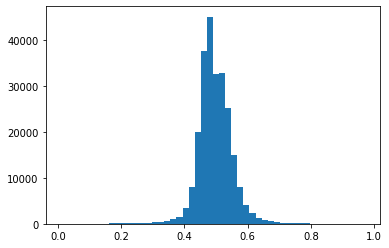

In [9]:
pred = model.predict(train_s[cols])
plt.hist(pred, bins=50)
plt.show()

In [10]:
test_s = (test - mu) / std
model.evaluate(test_s[cols], test['Direction'])

3261/3261 [==============================] - 2s 756us/step - loss: 0.6847 - accuracy: 0.5428


[0.6846846342086792, 0.5427905917167664]

(array([3.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00, 9.0000e+00,
        7.0000e+00, 8.0000e+00, 8.0000e+00, 1.8000e+01, 2.4000e+01,
        3.2000e+01, 2.8000e+01, 4.2000e+01, 5.7000e+01, 6.6000e+01,
        7.5000e+01, 1.1700e+02, 2.2300e+02, 5.3500e+02, 1.6220e+03,
        3.8540e+03, 6.4840e+03, 8.6460e+03, 9.5820e+03, 1.1100e+04,
        1.0512e+04, 1.1127e+04, 1.2282e+04, 1.1426e+04, 7.9720e+03,
        4.3640e+03, 2.0470e+03, 9.1300e+02, 4.4400e+02, 2.5100e+02,
        1.2100e+02, 9.7000e+01, 5.5000e+01, 4.5000e+01, 2.5000e+01,
        2.4000e+01, 2.0000e+01, 1.1000e+01, 9.0000e+00, 1.5000e+01,
        6.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([0.06365505, 0.08057959, 0.09750413, 0.11442868, 0.13135321,
        0.14827776, 0.1652023 , 0.18212685, 0.1990514 , 0.21597594,
        0.23290047, 0.24982502, 0.26674956, 0.2836741 , 0.30059865,
        0.31752318, 0.33444774, 0.35137227, 0.36829683, 0.38522136,
        0.4021459 , 0.41907045, 0.43599498, 0.

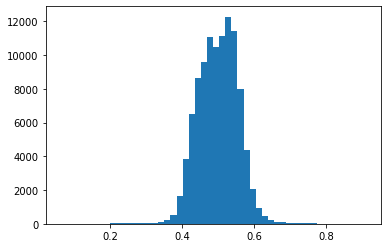

In [11]:
pred= model.predict(test_s[cols])
plt.hist(pred, bins=50)

In [12]:
test['proba'] = model.predict(test_s[cols])

In [13]:
test['position'] = np.where(test.proba < 0.42, -1, np.nan)
test['position'] = np.where(test.proba > 0.6, 1, test.position)

In [14]:
test.position.value_counts(dropna=False)

 NaN    94786
-1.0     7023
 1.0     2513
Name: position, dtype: int64

In [15]:
model.save("DNNMODEL")

INFO:tensorflow:Assets written to: DNNMODEL\assets


In [16]:
import pickle

In [17]:
params = {"mu":mu, "std":std}

In [18]:
pickle.dump(params, open("params.pkl", "wb"))